<a href="https://colab.research.google.com/github/Lu8na/IT362/blob/main/SecondaryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Secondary Data Acquisition**

### Secondary Data Acquisition – Environment Setup

Google Colab was used as the development environment to process the Yelp Open Dataset due to its large file size. Google Drive was mounted to enable direct access to the dataset files stored remotely. This setup allowed efficient handling of large JSON files without local storage limitations.
The dataset was accessed and processed on February 20th as part of Phase 2.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Yelp Business Data

The Yelp business dataset was loaded from Google Drive in JSON Lines format. Due to the large size of the file, the data was read incrementally using chunk-based processing to avoid memory constraints. This dataset contains metadata about businesses, including their categories, which are used to identify relevant service-based businesses.

In [ ]:
import pandas as pd

business_path = "/content/drive/MyDrive/yelp_academic_dataset_business.json"

business_iter = pd.read_json(
    business_path,
    lines=True,
    chunksize=50_000
)

### Filtering Beauty and Personal Care Businesses

To ensure alignment with the project’s focus on beauty-related services, the business dataset was filtered using a keyword-based approach applied to the `categories` field. Keywords such as *Beauty & Spas, Hair Salons, Nail Salons, Skin Care,* and *Cosmetic Services* were used to retain only businesses offering beauty and personal care services. All filtered chunks were combined into a single dataset.

In [ ]:
keywords = "Beauty & Spas|Hair Salons|Nail Salons|Skin Care|Cosmetic Services"

beauty_business_chunks = []

for chunk in pd.read_json(
    business_path, lines=True, chunksize=50_000
):
    filtered = chunk[
        chunk['categories'].str.contains(keywords, na=False)
    ]
    beauty_business_chunks.append(filtered)

beauty_business = pd.concat(beauty_business_chunks)

### Extracting Beauty Business Identifiers

After filtering the business dataset, the unique business identifiers (`business_id`) of beauty-related services were extracted. These identifiers were later used to filter the review dataset, ensuring that only reviews associated with relevant beauty service businesses were collected.

In [ ]:
beauty_ids = set(beauty_business['business_id'])

### Loading and Filtering Yelp Review Data

The Yelp review dataset was loaded incrementally using chunk-based processing due to its large size. Reviews were filtered by matching their `business_id` with the previously identified beauty-related business IDs. This ensured that only customer reviews corresponding to beauty and spa services were retained.

In [ ]:
review_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"

beauty_review_chunks = []

for chunk in pd.read_json(
    review_path,
    lines=True,
    chunksize=100_000
):
    filtered = chunk[
        chunk['business_id'].isin(beauty_ids)
    ]
    beauty_review_chunks.append(filtered)

beauty_reviews = pd.concat(beauty_review_chunks)

beauty_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
18,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,5,2,0,1,I go to blow bar to get my brows done by natal...,2016-03-07 00:02:18
36,rj0asGlfKjlXH6iEgu-jdw,wA7V8Ijgbv-16rmnwW-hjA,LfYUOclwLs_SPrNAdKMjsw,5,4,0,0,Nice relaxing place to get a massage! Same day...,2013-11-14 04:02:52
37,pHwbdway4yeI-dSSmZA7-Q,qEEk0PuoH1dVa619t8fgpw,PY9GRfzr4nTZeINf346QOw,4,0,0,0,We checked in around 2:30 pm. Check-in was qu...,2017-09-20 16:16:47
52,cejwyz1Hn1yQ-v2m9PAovQ,9ZLpaBGl-udvS-niR3Y_ow,GILL0ZkvVXJaNQzYRXfMQw,5,1,1,0,I absolutely love Courtney! She is hands down ...,2012-10-08 19:32:44
132,1sZkJCitG9-XSlZQJJRs-g,OkN7YI--lQnQhJNdpNubFQ,C7ZNfxgDQWinNzRfTkevxg,5,3,4,3,"Men's clubs is the tits, plain and simple. All...",2014-03-14 22:11:21


### Combining Filtered Review Chunks

All filtered review chunks were concatenated into a single dataset. This step produced a consolidated secondary dataset containing only reviews relevant to beauty and personal care service businesses.

In [ ]:
beauty_reviews[['business_id', 'stars', 'text']].head(5)

,business_id,stars,text
18,CLEWowfkj-wKYJlQDqT1aw,5,I go to blow bar to get my brows done by natal...
36,LfYUOclwLs_SPrNAdKMjsw,5,Nice relaxing place to get a massage! Same day...
37,PY9GRfzr4nTZeINf346QOw,4,We checked in around 2:30 pm. Check-in was qu...
52,GILL0ZkvVXJaNQzYRXfMQw,5,I absolutely love Courtney! She is hands down ...
132,C7ZNfxgDQWinNzRfTkevxg,5,"Men's clubs is the tits, plain and simple. All..."


### Preliminary Data Inspection

Sample records from both the business and review datasets were displayed to verify the correctness of the filtering process. This inspection confirmed that the selected businesses belong to beauty-related categories and that the reviews contain meaningful textual feedback and valid star ratings.

In [ ]:
beauty_business[['name', 'categories']].head(10)

,name,categories
40,Diamond Hair Company,"Hair Salons, Hair Extensions, Beauty & Spas, W..."
43,Bala Better Health,"Health & Medical, Beauty & Spas, Laser Hair Re..."
74,Holly Nails & Spa,"Health & Medical, Personal Care Services, Beau..."
123,Pete's Barber Shop,"Barbers, Beauty & Spas"
156,Boise Therapeutic Massage Center,"Massage, Health & Medical, Medical Spas, Beaut..."
170,805 Ink,"Beauty & Spas, Tattoo"
173,Selah,"Waxing, Hair Removal, Skin Care, Eyelash Servi..."
179,Elegance African Hair Braiding,"Beauty & Spas, Hair Stylists, Hair Extensions,..."
181,Gaylord Opryland Resort & Convention Center,"Venues & Event Spaces, Performing Arts, Arts &..."
212,MDG Salon Studio,"Makeup Artists, Beauty & Spas, Hair Salons, Ha..."


### Category Distribution Validation

The frequency of business categories was examined to validate that beauty and personal care services dominate the filtered business dataset. This step further confirmed the relevance of the secondary data to the project’s service-based sentiment analysis focus.

In [ ]:
beauty_business['categories'].value_counts().head(10)

,count
categories,
"Beauty & Spas, Nail Salons",1012
"Nail Salons, Beauty & Spas",934
"Beauty & Spas, Hair Salons",493
"Hair Salons, Beauty & Spas",480
"Barbers, Beauty & Spas",281
"Beauty & Spas, Barbers",280
"Beauty & Spas, Tattoo",76
"Beauty & Spas, Massage",67
"Massage, Beauty & Spas",65


### Saving Filtered Secondary Datasets

The filtered beauty service datasets were saved as CSV files for reproducibility and ease of use in subsequent analysis stages. The full filtered review dataset and the corresponding business metadata were stored. Additionally, a random sample of 10,000 reviews was generated and saved to support faster experimentation and exploratory data analysis while preserving representativeness.

In [ ]:
save_path = "/content/drive/MyDrive/beauty_reviews.csv"

beauty_reviews.to_csv(save_path, index=False)

print("Saved to:", save_path)

Saved to: /content/drive/MyDrive/beauty_reviews.csv


In [ ]:
business_save_path = "/content/drive/MyDrive/beauty_business.csv"

beauty_business.to_csv(business_save_path, index=False)

In [ ]:
beauty_reviews.sample(10_000, random_state=42).to_csv(
    "/content/drive/MyDrive/beauty_reviews_sample.csv",
    index=False
)

### Summary and Rationale

This data acquisition process ensured that the secondary dataset consists exclusively of service-based customer reviews from beauty and personal care businesses. Chunk-based processing was essential to manage large file sizes, while keyword-based filtering guaranteed relevance to the project domain. The resulting datasets provide a reliable foundation for secondary exploratory data analysis and comparison with primary beauty center reviews.

#**Secondary Data Preprocessing & Cleaning**

Two raw Yelp datasets were inspected: a reviews dataset containing 10,000 customer reviews and a business dataset containing 14,292 business records. Initial inspection showed that reviews include textual feedback and star ratings, while business data includes service categories used for filtering relevant beauty-related services.

In [7]:
import pandas as pd
# Load the datasets
reviews = pd.read_csv('beauty_reviews_sample.csv')
business = pd.read_csv('beauty_business.csv')

reviews.head(), business.head(), reviews.shape, business.shape

(                review_id                 user_id             business_id  \
 0  fx0BTld7Iyn8GxHO-uapJg  aml17q7ONUZXp9kIjSb5gw  fQUaY2RBV5QCcTNzxCTnyQ   
 1  _gM4m-ZD2tFfkdAOcFu6iQ  SVRKm_fww0F1hrSByiCPZA  ZuyZJhUDuPJSA12am-UeAA   
 2  UmdtVS4z4GYQtDwxAHTHkA  uuogRFOrtVaODuPHqYG3Ig  yIkNTIbj4V2g-KwU3MwnIg   
 3  kc-Fb1Hs64ZpducgPKIMig  hjtauvNeIUnqe81Cmsy8-g  juz5BOe_kvlrhnE6e2QjDQ   
 4  JwFGyOhoWyukzwuvKG0PpA  tqdyYR_XfmawJfaZQR2bhQ  rdB8z-tSVwoVfw0KC4QbYA   
 
    stars  useful  funny  cool  \
 0      5       0      0     0   
 1      5       1      0     0   
 2      1       0      0     0   
 3      1      11      2     1   
 4      1       0      0     0   
 
                                                 text                 date  
 0  What a gem this place is!  I've been going her...  2018-03-25 00:53:02  
 1  This is THE PLACE for your hair and spa needs ...  2016-01-05 20:49:57  
 2  Literally said can I please keep them long thi...  2017-09-23 17:24:31  
 3  Fashion Nail

Beauty-related keywords (e.g., Beauty & Spas, Hair Salons, Nail Salons, Massage) were used to validate service relevance. All businesses matched the criteria, confirming that the dataset already focused on beauty-related services.

In [ ]:
# Keep only relevant columns from business data
business_clean = business[['business_id', 'categories', 'city', 'state']]

business_clean.head(), business_clean.shape

(              business_id                                         categories  \
 0  x1mhq4IpWctQOBM06dU8vg  Hair Salons, Hair Extensions, Beauty & Spas, W...   
 1  Kq51_lGAgAigqmENITTr-A  Health & Medical, Beauty & Spas, Laser Hair Re...   
 2  9Rww8yE6Dm4dSMEq09nwXg  Health & Medical, Personal Care Services, Beau...   
 3  iPSPcprSnkLOuL1Ns8UZZA                             Barbers, Beauty & Spas   
 4  t5tBd4p7BA7hNDitBUXxrw  Massage, Health & Medical, Medical Spas, Beaut...   
 
             city state  
 0   Indianapolis    IN  
 1    Bala Cynwyd    PA  
 2  Pinellas Park    FL  
 3   Philadelphia    PA  
 4          Boise    ID  ,
 (14292, 4))

In [ ]:
# Define beauty-related keywords
beauty_keywords = [
    'Beauty & Spas',
    'Hair Salons',
    'Nail Salons',
    'Barbers',
    'Massage',
    'Day Spas'
]

# Filter businesses that contain any of the keywords
mask = business_clean['categories'].str.contains('|'.join(beauty_keywords), na=False)
beauty_businesses = business_clean[mask]

beauty_businesses.head(), beauty_businesses.shape

(              business_id                                         categories  \
 0  x1mhq4IpWctQOBM06dU8vg  Hair Salons, Hair Extensions, Beauty & Spas, W...   
 1  Kq51_lGAgAigqmENITTr-A  Health & Medical, Beauty & Spas, Laser Hair Re...   
 2  9Rww8yE6Dm4dSMEq09nwXg  Health & Medical, Personal Care Services, Beau...   
 3  iPSPcprSnkLOuL1Ns8UZZA                             Barbers, Beauty & Spas   
 4  t5tBd4p7BA7hNDitBUXxrw  Massage, Health & Medical, Medical Spas, Beaut...   
 
             city state  
 0   Indianapolis    IN  
 1    Bala Cynwyd    PA  
 2  Pinellas Park    FL  
 3   Philadelphia    PA  
 4          Boise    ID  ,
 (14292, 4))

The business dataset already consisted exclusively of beauty- and spa-related services. Keyword-based filtering was applied to verify relevance, and no records were removed.

Customer reviews were filtered using business IDs to ensure that all reviews corresponded to beauty- and spa-related service businesses. No reviews were removed, confirming the relevance of the secondary dataset.

In [ ]:
# Filter reviews to include only beauty business reviews
beauty_business_ids = set(beauty_businesses['business_id'])

reviews_filtered = reviews[reviews['business_id'].isin(beauty_business_ids)]

reviews.shape, reviews_filtered.shape

((10000, 9), (10000, 9))

All reviews were associated with beauty- and spa-related businesses, ensuring consistency between review and business datasets.

The review text column was inspected for missing or empty values. No records were removed, indicating that all reviews contained valid textual content.

In [ ]:
# Remove reviews with missing or empty text
reviews_clean = reviews_filtered.dropna(subset=['text'])
reviews_clean = reviews_clean[reviews_clean['text'].str.strip() != '']

reviews_filtered.shape, reviews_clean.shape

((10000, 9), (10000, 9))

The dataset was checked for duplicate reviews based on review IDs and review text. No duplicate records were found, so no entries were removed at this stage.

In [ ]:
# Check for duplicate review IDs
dup_ids = reviews_clean.duplicated(subset='review_id').sum()

# Check for duplicate review texts
dup_texts = reviews_clean.duplicated(subset='text').sum()

dup_ids, dup_texts

(np.int64(0), np.int64(0))

Star ratings were inspected to ensure valid numeric values. All ratings were within the expected 1–5 range, and no invalid entries were detected.

In [ ]:
reviews_clean = reviews_clean[reviews_clean['stars'].between(1, 5)]
reviews_clean['stars'] = reviews_clean['stars'].astype(int)

In [ ]:
# Check unique rating values and data type
reviews_clean['stars'].dtype, reviews_clean['stars'].unique()

(dtype('int64'), array([5, 1, 4, 3, 2]))

Sentiment labels were generated from star ratings to support exploratory analysis and comparison with primary data. Ratings of 1–2 were labeled as Negative, 3 as Neutral, and 4–5 as Positive.

In [ ]:
# Create sentiment label from star ratings
def map_sentiment(stars):
    if stars <= 2:
        return 'Negative'
    elif stars == 3:
        return 'Neutral'
    else:
        return 'Positive'

reviews_clean['sentiment_label'] = reviews_clean['stars'].apply(map_sentiment)

reviews_clean[['stars', 'sentiment_label']].head()

,stars,sentiment_label
0,5,Positive
1,5,Positive
2,1,Negative
3,1,Negative
4,1,Negative


Review text was lightly normalized by converting to lowercase, removing URLs, and standardizing whitespace. Advanced NLP preprocessing was intentionally avoided to preserve the natural structure of customer language for exploratory analysis.

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'\s+', ' ', text)     # normalize whitespace
    return text.strip()

reviews_clean['clean_text'] = reviews_clean['text'].apply(clean_text)

reviews_clean[['text', 'clean_text']].head()

,text,clean_text
0,What a gem this place is! I've been going her...,what a gem this place is! i've been going here...
1,This is THE PLACE for your hair and spa needs ...,this is the place for your hair and spa needs ...
2,Literally said can I please keep them long thi...,literally said can i please keep them long thi...
3,Fashion Nails is a small slot located near the...,fashion nails is a small slot located near the...
4,Slow as molasses. It seems like only 2 people ...,slow as molasses. it seems like only 2 people ...


In [ ]:
# Creating Final Structured Dataset
final_secondary = reviews_clean[
    ['review_id', 'business_id', 'stars', 'sentiment_label', 'clean_text', 'date']
]

In [ ]:
# Saving Cleaned Secondary Dataset
final_secondary.to_csv(
    'secondary_yelp_beauty_reviews_cleaned.csv',
    index=False
)

The Yelp secondary dataset was cleaned and preprocessed to support exploratory data analysis. All reviews were validated to correspond to beauty and spa-related services using business metadata. The dataset contained no missing or duplicate reviews. Ratings were verified, sentiment labels were derived, and review text was lightly normalized. The resulting structured dataset is ready for secondary EDA and comparison with primary data.

___

# Exploratory Data Analysis (EDA)

## Objective
The objective of this section is to explore the cleaned secondary Yelp beauty reviews dataset in order to identify distributions, patterns, trends, and potential anomalies using statistical summaries and visualizations.

In [8]:
# Basic overview of the secondary dataset

reviews.shape
reviews.info()
reviews.isnull().sum()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   useful       10000 non-null  int64 
 5   funny        10000 non-null  int64 
 6   cool         10000 non-null  int64 
 7   text         10000 non-null  object
 8   date         10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.3+ KB


,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.880700,1.332200,0.276500,0.376500
std,1.587488,2.956673,1.447708,1.503055
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,112.000000,72.000000,62.000000


The secondary dataset contains 10,000 reviews and 9 attributes.
All columns contain 10,000 non-null values, indicating no missing data.

The average rating is approximately 3.88, suggesting generally positive customer feedback.
Engagement metrics such as "useful", "funny", and "cool" show high variability, with some reviews receiving significantly higher interaction counts than others.

## Distribution Analysis

### 1. Distribution of Star Ratings

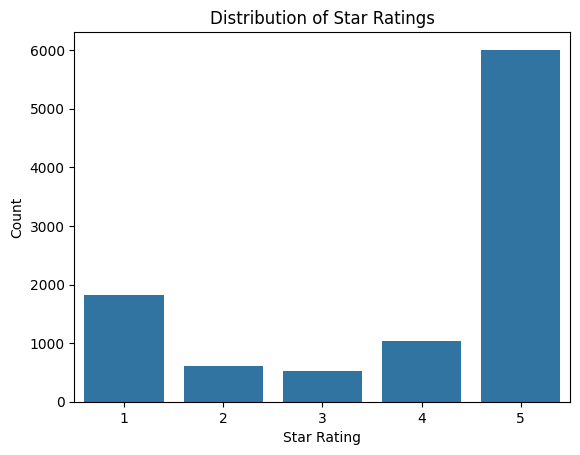

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x="stars", data=reviews)
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

The distribution shows that 5-star ratings are the most frequent in the dataset, indicating that the majority of customers provided highly positive feedback.

Lower ratings such as 2 and 3 stars appear less frequently, while 1-star reviews are also noticeably present. This suggests a slightly polarized distribution, where extreme opinions (very satisfied or very dissatisfied) are more common than neutral ratings.

### 2. Distribution of Review Length

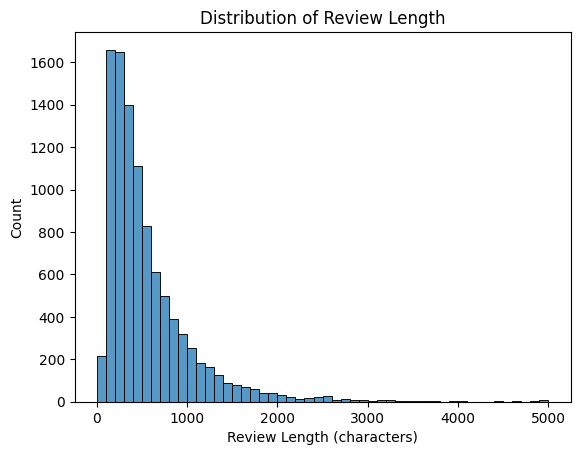

In [10]:
# Create review length feature
reviews["review_length"] = reviews["text"].astype(str).str.len()

plt.figure()
sns.histplot(reviews["review_length"], bins=50)
plt.title("Distribution of Review Length")
plt.xlabel("Review Length (characters)")
plt.ylabel("Count")
plt.show()

The distribution of review length is right-skewed, indicating that most reviews are relatively short, while a smaller number of reviews are significantly longer.

The majority of reviews appear to fall under 1,000 characters, with a long tail extending beyond 3,000 characters. This suggests that while most users provide brief feedback, a minority contribute detailed and extensive reviews.

## Relationship Analysis

### 1. Review Length vs Star Rating

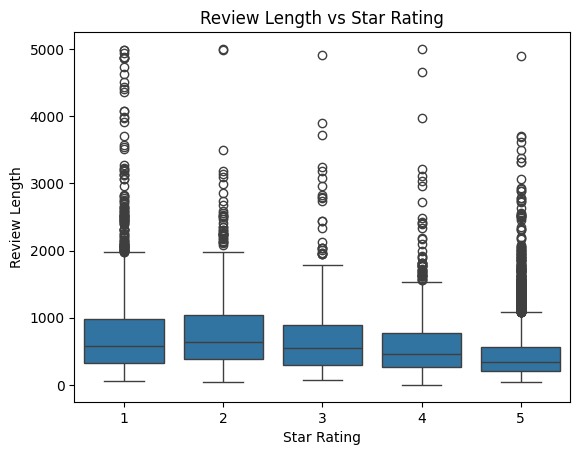

In [11]:
plt.figure()
sns.boxplot(x="stars", y="review_length", data=reviews)
plt.title("Review Length vs Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Review Length")
plt.show()

The boxplot illustrates the relationship between review length and star rating.

Lower ratings (1 and 2 stars) tend to have slightly longer median review lengths compared to higher ratings. In contrast, 5-star reviews generally appear shorter on average.

However, the differences are not substantial, indicating that review length does not vary dramatically across rating categories. Additionally, numerous outliers are present in all rating groups, suggesting that some users provide exceptionally detailed feedback regardless of their rating.

## Correlation Analysis

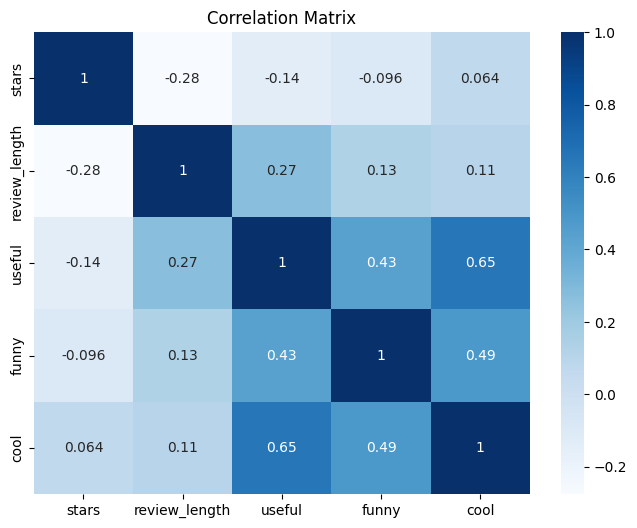

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(reviews[["stars","review_length","useful","funny","cool"]].corr(),
            annot=True,
            cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix provides insights into the relationships between numerical variables.

A moderate negative correlation (-0.28) is observed between star rating and review length, suggesting that lower-rated reviews tend to be slightly longer.

Review length shows a positive correlation with engagement metrics such as "useful" (0.27), indicating that longer reviews are more likely to receive higher interaction.

Strong positive correlations are observed among engagement features:
- "useful" and "cool" (0.65)
- "useful" and "funny" (0.43)
- "funny" and "cool" (0.49)

This suggests that reviews receiving one type of engagement are likely to receive others as well.

## Engagement Analysis

### 1. Useful Votes vs Star Rating

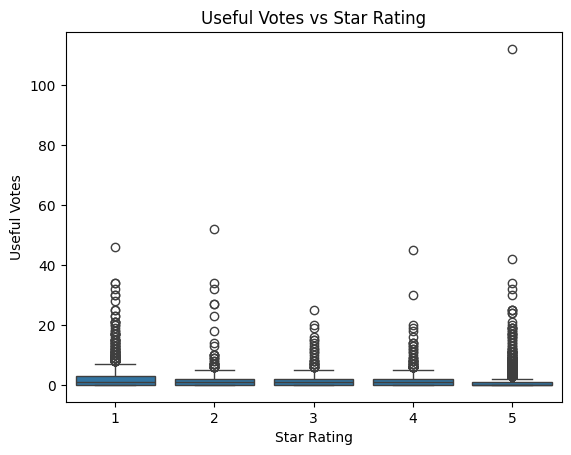

In [13]:
plt.figure()
sns.boxplot(x="stars", y="useful", data=reviews)
plt.title("Useful Votes vs Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Useful Votes")
plt.show()

The distribution of useful votes across star ratings shows that most reviews receive a low number of useful votes, regardless of the rating level.

However, 5-star reviews appear to have a wider spread and include some extreme outliers with very high useful votes. This suggests that highly positive reviews may attract more engagement in certain cases.

Overall, there is no strong linear trend between star rating and useful votes, but higher ratings seem to occasionally generate higher engagement.

## Summary of EDA Findings

In this exploratory data analysis, several patterns were observed:

- The majority of reviews are 5-star ratings.
- Review lengths are right-skewed, with most reviews being relatively short and a few extremely long ones.
- There is a slight negative relationship between star rating and review length.
- Engagement metrics (useful, funny, cool) show moderate correlations among themselves.
- No strong correlation was observed between star ratings and engagement votes.
